# Imports

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import time
import pickle
import math
from collections import deque
from pingpong import pingpongRL
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

pygame 2.0.1 (SDL 2.0.14, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def print_report(time_stamp, game="pp"):
    # fetch data
    PATH = f"RL/agents/agent_{game}_{time_stamp}/"
    settings = pickle.load(open(f"{PATH}settings.p", "rb"))
    #memory = list(pickle.load(open(f"{PATH}memory.p", "rb")))
    loss = list(pickle.load(open(f"{PATH}loss.p", "rb")))
    score = list(pickle.load(open(f"{PATH}scores.p", "rb")))

    # display settings
    display(settings)

    # training curve and score
    fig, axs = plt.subplots(2, 1, figsize=(10, 5))
    episodes = np.linspace(0, len(loss)-1, len(loss))
    ax = axs[0]
    ax.plot(episodes, loss)
    ax.set(ylabel='Loss')
    ax = axs[1]
    ax.plot(episodes, score, label='Score')
    ax.plot(episodes[:-1], [np.mean(score[0:t]) for t in range(1, len(score))],
            label='Cumulative Mean')
    ax.set(ylabel='Score', xlabel='Episode')
    ax.legend()

{'episodes': 500,
 'epsilon': 1.0,
 'epsilon_step_decay': 0.9925,
 'epsilon_episode_decay': 0.98,
 'epsilon_min': 0.01,
 'racket_speed': 20.0,
 'racket_width_start': 200.0,
 'racket_width_min': 20.0,
 'racket_width_decrease': 1.0,
 'ball_yspeed_start': 20.0,
 'ball_yspeed_max': 150.0,
 'ball_yspeed_increase': 1.05}

{'episodes': 500,
 'epsilon': 1.0,
 'epsilon_step_decay': 0.9925,
 'epsilon_episode_decay': 0.98,
 'epsilon_min': 0.01,
 'racket_speed': 20.0,
 'racket_width_start': 200.0,
 'racket_width_min': 20.0,
 'racket_width_decrease': 1.0,
 'ball_yspeed_start': 20.0,
 'ball_yspeed_max': 150.0,
 'ball_yspeed_increase': 1.05}

{'episodes': 500,
 'epsilon': 1.0,
 'epsilon_step_decay': 0.9925,
 'epsilon_episode_decay': 0.98,
 'epsilon_min': 0.01,
 'racket_speed': 20.0,
 'racket_width_start': 200.0,
 'racket_width_min': 20.0,
 'racket_width_decrease': 1.0,
 'ball_yspeed_start': 20.0,
 'ball_yspeed_max': 150.0,
 'ball_yspeed_increase': 1.05}

{'episodes': 500,
 'epsilon': 1.0,
 'epsilon_step_decay': 0.9925,
 'epsilon_episode_decay': 0.98,
 'epsilon_min': 0.01,
 'racket_speed': 20.0,
 'racket_width_start': 200.0,
 'racket_width_min': 20.0,
 'racket_width_decrease': 1.0,
 'ball_yspeed_start': 20.0,
 'ball_yspeed_max': 150.0,
 'ball_yspeed_increase': 1.05}

{'episodes': 500,
 'epsilon': 1.0,
 'epsilon_step_decay': 0.9925,
 'epsilon_episode_decay': 0.98,
 'epsilon_min': 0.01,
 'racket_speed': 20.0,
 'racket_width_start': 200.0,
 'racket_width_min': 20.0,
 'racket_width_decrease': 1.0,
 'ball_yspeed_start': 20.0,
 'ball_yspeed_max': 150.0,
 'ball_yspeed_increase': 1.05}

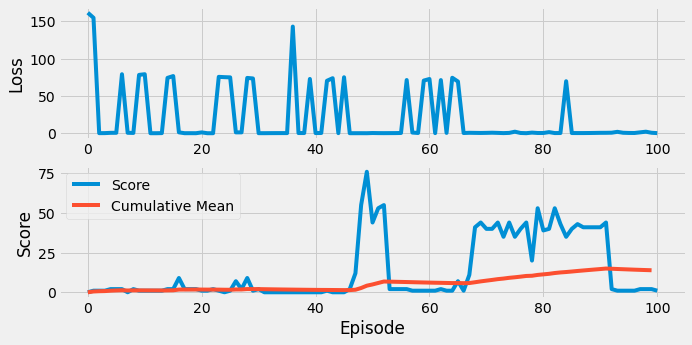

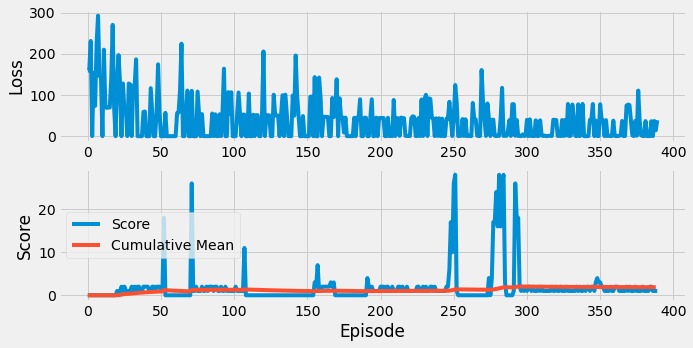

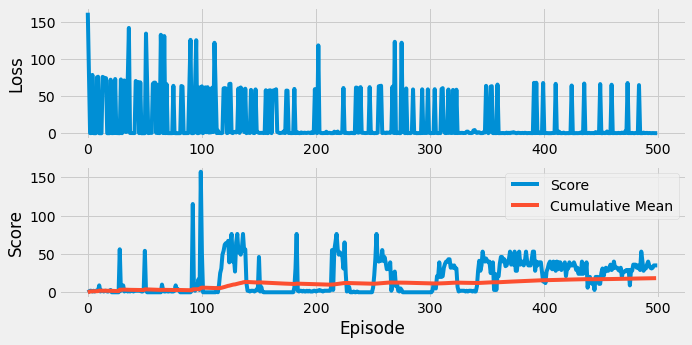

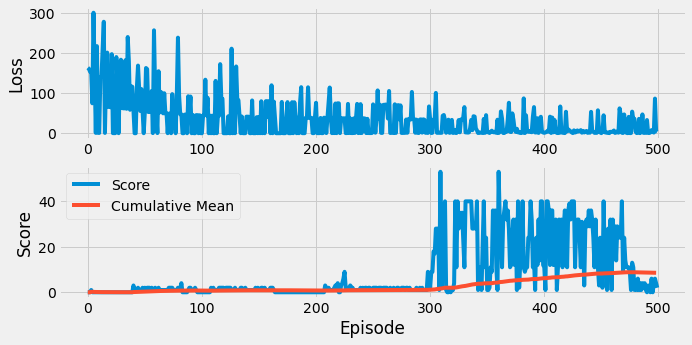

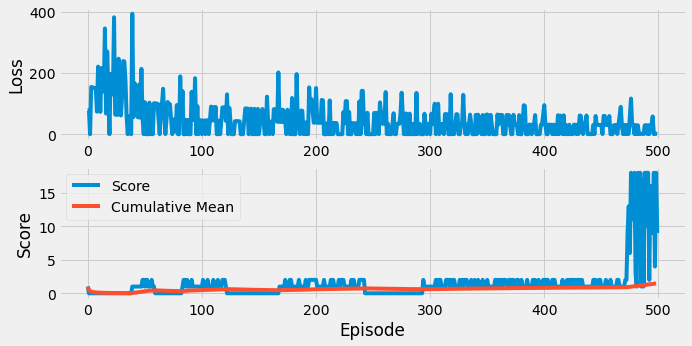

In [8]:
runs = ["210709_1601", "210709_1706", "210709_1759", "210709_2055", "210709_2352"]
for run in runs:
    print_report(run)

In [17]:
int(3)/int(5)

0.6

In [12]:
def step_decay(t):
    return epsilon * epsilon_step_decay ** t

def episode_decay(t):
    return epsilon*epsilon_episode_decay**t

In [34]:
epsilon_min = 0.01
epsilon = 1.0
epsilon_step_decay = 0.99
epsilon_episode_decay = 0.98
steps = np.linspace(0,2*60*2-1,2*60*2)
episodes = np.linspace(0,99,100)

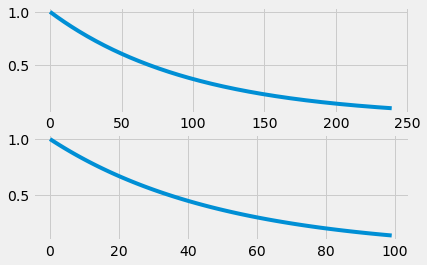

In [35]:
fig, axs = plt.subplots(2,1)
ax=axs[0]
ax.plot(steps, step_decay(steps))
#ax.plot([steps[0], steps[-1]], [epsilon_min, epsilon_min])
ax=axs[1]
ax.plot(episodes, episode_decay(episodes))
#ax.plot([episodes[0], episodes[-1]], [epsilon_min, epsilon_min])

In [36]:
0%10

0

In [16]:
model=keras.models.load_model("RL/agents/model")

In [17]:
model

In [19]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: GPU device not found

In [23]:
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))



This error most likely means that this notebook is not configured to use a GPU.  Change this in Notebook Settings via the command palette (cmd/ctrl-shift-P) or the Edit menu.




SystemError: GPU device not found

In [24]:
def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

In [26]:
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)

CPU (s):
2.8235140999995565
